<a href="https://colab.research.google.com/github/Lianyihwei/RobbiLian/blob/master/FinanceWithPython_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART1 搜集、整理股票資料，並計算與繪製常用技術分析指標
python有不少可以搜集股票資訊的api，除非要練習爬蟲，建議使用這些api，一來下載資料速度較快，二來可以避免大量爬網站造成伺服器負擔  
這次我們主要使用yahoo finance api來下載資料，另外有pandas-**datareader與ffn可使用  
使用googlecolab或jupyternotebook需先安裝相關套件  

## 在Google Colab上安裝所需套件
如果是在本地端電腦安裝，直接輸入pip install <套件名稱>  前面不用+!

In [ ]:
!pip install yfinance
!pip install --upgrade pandas
!pip install plotly==5.3.1
# plotly==5.3.1 work kaleido well
# !pip install -U kaleido
# !pip install pandas-ta

## 使用yahoo finance提供api yfinance下載股票資料

In [ ]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import datetime

# yfinance 美股直接用代號如aapl、tsla。台股是代號加上.tw
# 下載的區間可以用 start=開始日期，end=結束日期，或是下面的範例用periods從今天開始往前算的區間加上間隔
# 區間 periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# 間隔 intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
ticker_symbol = "2330.tw"
tsmc = yf.download(tickers=ticker_symbol, period="3y", interval="1d")
print(tsmc.tail())
print(type(tsmc))

[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2022-06-28  496.0  500.0  496.0  497.5      497.5  15274062
2022-06-29  496.0  498.5  491.0  491.0      491.0  30533789
2022-06-30  484.5  486.5  476.0  476.0      476.0  46311432
2022-07-01  471.5  474.0  452.5  453.5      453.5  61744377
2022-07-04  443.0  451.5  440.0  440.0      440.0  54268326
<class 'pandas.core.frame.DataFrame'>


## 計算常用技術分析指標
1. Moving Average
2. MACD (Moving Average Convergence / Divergence)
3. RSI (Relative Strength Index)
4. ADX (Average Directional Movement Index)

## Moving Average 代表過去一段時間裡的平均成交價格，主要目的是用來判斷趨勢及市場現在跟未來可能走勢，公式：
MA = (A1 + A2 + ……….An) / n

In [ ]:
# 計算MA120, MA20, MA60
# 使用pandas函式rolling(n).mean()就可以計算出n天內的平均指，也可用max(),min(),std()計簡n天內的最大，小，標準差
tsmc["MA5"] = tsmc.Close.rolling(5).mean()
tsmc["MA20"] = tsmc.Close.rolling(20).mean()
tsmc["MA60"] = tsmc.Close.rolling(60).mean()
tsmc["MA240"] =tsmc.Close.rolling(240).mean()
tsmc.tail()

,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,MA60,MA240
Date,,,,,,,,,,
2022-06-28,496.0,500.0,496.0,497.5,497.5,15274062,492.5,517.575,534.858333,586.114583
2022-06-29,496.0,498.5,491.0,491.0,491.0,30533789,491.8,514.125,533.091667,585.693750
2022-06-30,484.5,486.5,476.0,476.0,476.0,46311432,489.9,510.475,531.208333,585.202083
2022-07-01,471.5,474.0,452.5,453.5,453.5,61744377,483.3,506.150,529.133333,584.641667
2022-07-04,443.0,451.5,440.0,440.0,440.0,54268326,471.6,501.150,527.033333,584.041667


## 產生圖表，使用plotly可簡單產出互動式圖表

均線的黃金與死亡交叉  
短期、中期、長期的移動平均線常互相纏繞或交錯，它們交錯的地方，就稱作「黃金交叉」或「死亡交叉」

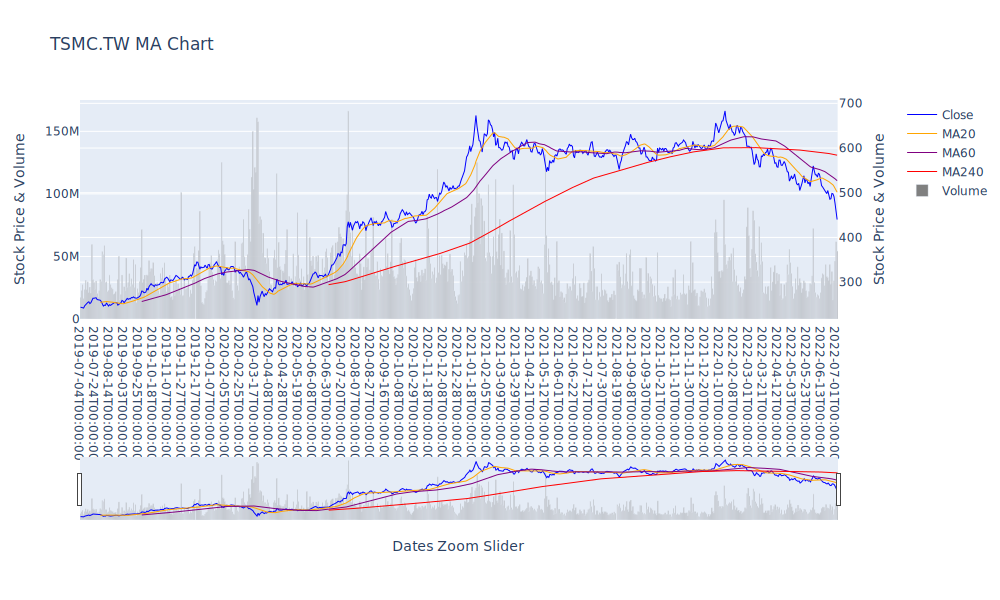

In [ ]:
# import plot與相關套件
import plotly
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# 產生plotly內要繪製的圖形內容 tsmc.Close = tsme["Close"]
close = go.Scatter(x = tsmc.index, y = tsmc.Close, line = dict(color = "blue", width = 1), name = "Close")
# ma5 = go.Scatter(x = tsmc.index, y = tsmc.MA5, line = dict(color = "yellow", width = 1), name = "MA5")
ma20 = go.Scatter(x = tsmc.index, y = tsmc.MA20, line = dict(color = "orange", width = 1), name = "MA20")
ma60 = go.Scatter(x = tsmc.index, y = tsmc.MA60, line = dict(color = "purple", width = 1), name = "MA60")
ma240 = go.Scatter(x = tsmc.index, y = tsmc.MA240, line = dict(color = "red", width = 1), name = "MA240")

# 產生vloume(成交量)的長條圖
vol = go.Bar(x=tsmc.index, y=tsmc.Volume, name="Volume", marker_color = "gray")

# 設定畫布有第二個Y軸指標
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(trace=close, secondary_y=True)
# fig.add_trace(trace=ma5, secondary_y=True)
fig.add_trace(trace=ma20, secondary_y=True)
fig.add_trace(trace=ma60, secondary_y=True)
fig.add_trace(trace=ma240, secondary_y=True)
fig.add_trace(trace=vol, secondary_y=False)

# 設定畫布layout
fig.update_layout(title="TSMC.TW MA Chart", width=1000, height=600)

# plotly 有一個小缺點是沒有資料的日期會留空白，資料量多不明顯，但如果期間短看起來就會有斷層
# 有2個語法可以把不要的日期從plot中移除，bounds是
fig.update_xaxes(rangeslider_visible=True, title = "Dates Zoom Slider")
# 方法一，設定xaxis.type = "category"
fig.layout.xaxis.type = "category"
# 方法二，用xaxis_rangebreaks把bang掉指定區間(bounds)或日期(value)(如資料單位為min，可用dict(bounds=[13.5, 9], pattern="hour")把收盤時間ban掉 )
# fig.update_layout(wrangeslider_visible=True, title = "Dates Zoom Slider",
#                                 xaxis_rangebreaks = [dict(bounds = ["sat", "mon"])])
fig.update_yaxes(title="Stock Price & Volume")
# plotly產生互動式圖檔為.html，因github不支援所以這邊使用show("svg")
# 本地端可用fig.show()
fig.show("svg")

## 使用OHLC製作常用的candles圖

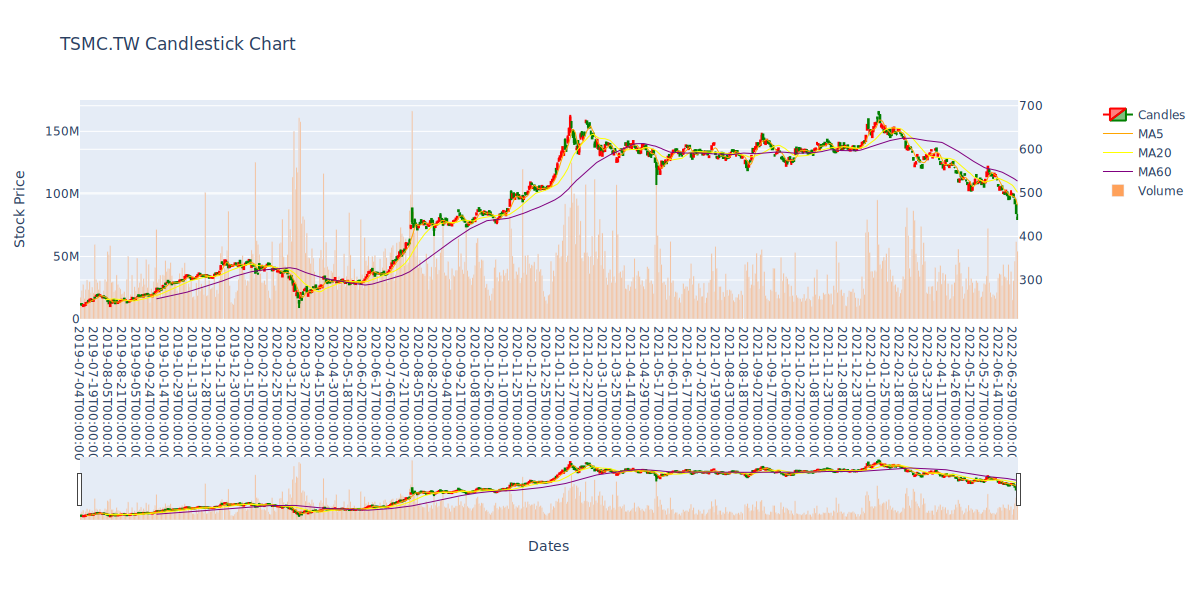

In [ ]:
# 產生plotly內要繪製的圖形內容 tsmc.Open = tsme["Open"]
# 產生candles(台股漲紅跌綠，另外設定increasing_line_color= 'red', decreasing_line_color= 'green')
candles = go.Candlestick(x = tsmc.index, open = tsmc.Open, high = tsmc.High,
                                            low = tsmc.Low, close = tsmc.Close, name = "Candles",
                                            increasing_line_color= 'red', decreasing_line_color= 'green',)

# 產生ma5, ma20, ma60
ma5 = go.Scatter(x = tsmc.index, y = tsmc.MA5, line = dict(color = "orange", width = 1), name = "MA5")
ma20 = go.Scatter(x = tsmc.index, y = tsmc.MA20, line = dict(color = "yellow", width = 1), name = "MA20")
ma60 = go.Scatter(x = tsmc.index, y = tsmc.MA60, line = dict(color = "purple", width = 1), name = "MA60")

# 產生vloume(成交量)的長條圖
vol = go.Bar(x=tsmc.index, y=tsmc.Volume, name="Volume")

# 設定畫布有第二個Y軸指標
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 將產生的plots加入畫布,secondary_y=True 設定plot的y軸顯示在右邊的y軸，False是顯示在左邊
fig.add_trace(trace=candles, secondary_y=True)
fig.add_trace(trace=ma5, secondary_y=True)
fig.add_trace(trace=ma20, secondary_y=True)
fig.add_trace(trace=ma60, secondary_y=True)
fig.add_trace(trace=vol, secondary_y=False)

# 設定畫布layout-1增加區間選項按鈕 '5d', '15d, '1m', '3m', '6m', '1y', 'all'
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5,
                     label="5D",
                     step="day",
                     stepmode="todate"),
                dict(count=15,
                     label="15D",
                     step="day",
                     stepmode="todate"),
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="todate"),
                dict(count=3,
                     label="3m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="3M",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(label="All", step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

# 設定畫布layout-2(可以加在上段後面) 為避免混亂習慣分開寫，設定x,y軸title，主title跟大小
fig.update_layout(xaxis_title="Dates", yaxis_title="Stock Price", 
                  title="TSMC.TW Candlestick Chart", 
                  width=1200, height=600)

# plotly 有一個小缺點是沒有資料的日期會留空白，資料量多不明顯，但如果期間短看起來就會有斷層
# 以下面的語法可以把不要的日期從plot中移除，bounds是ban掉指定區間(如資料內容包含到min，可用dict(bounds=[9, 13.5], pattern="hour")把收盤時間ban掉 )
# values是ban掉指定日期
fig.update_xaxes(rangeslider_visible=True)
# 如果設定xaxis.type = "category"，就會把無資料的日期從圖中ban掉，但會默認shared_xaxes為False
fig.layout.xaxis.type = "category"
# fig.show()
fig.write_html("2330TW.html", auto_open = True)
fig.show("svg")

## MACD (Moving Average Convergence / Divergence) 指數平滑異同移動平均線，長期與短期移動平均線收斂或發散的徵兆，加以雙重平滑處理，用來判斷買賣股票的時機與訊號。
###### MACD 指標組成有EMA(指數平滑移動平均線)，DIF(離差值)
###### 計算公式為 DIF(快線) = EMA12 - EMA26 ，DEM(慢線) = EMA(DIF，9)，OSC = DIF - DEM

[*********************100%***********************]  1 of 1 completed


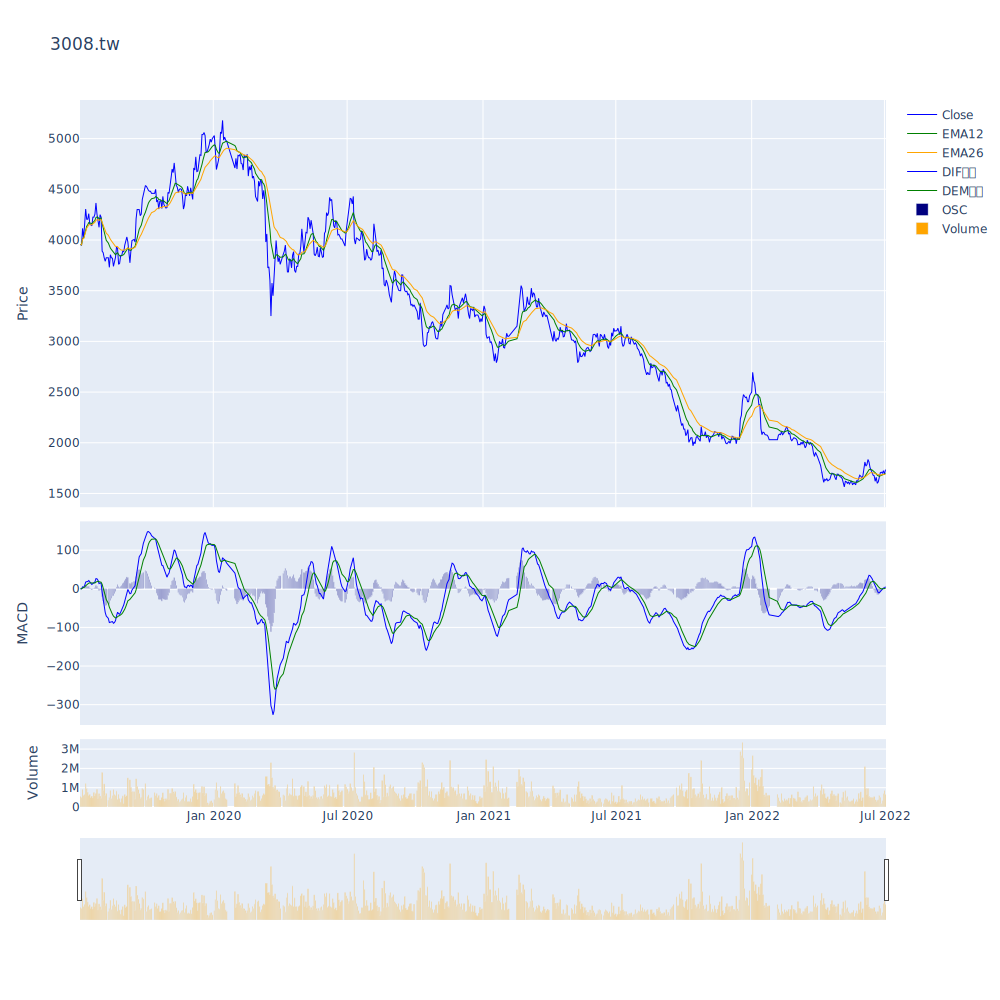

In [ ]:
# 這裡將程式包成一個function()，方便之後檢視不同的股票各式指標與圖形
def ticker_macd(ticker, period_time, intervals_time):
    ticker_df = yf.download(tickers=ticker, period=period_time, interval=intervals_time)
    ticker_df["EMA12"] = ticker_df["Close"].ewm(span = 12).mean()
    ticker_df["EMA26"] = ticker_df["Close"].ewm(span = 26).mean()
    ticker_df["DIF"] = ticker_df["EMA12"] - ticker_df["EMA26"]
    ticker_df["DEM"] = ticker_df["DIF"].ewm(span = 9).mean()
    ticker_df["OSC"] = ticker_df["DIF"] - ticker_df["DEM"]

    fig = make_subplots(rows = 3, cols = 1, shared_xaxes = True, vertical_spacing = 0.02, row_heights=[0.6, 0.3, 0.1])
    fig.add_trace(go.Scatter(x = ticker_df.index, y=ticker_df["Close"], name = "Close",
                                                line = dict(color = "blue", width = 1)), 
                                            row = 1, col = 1)
    fig.add_trace(go.Scatter(x = ticker_df.index, y=ticker_df["EMA12"], name = "EMA12",
                                                line = dict(color = "green", width = 1)), 
                                            row = 1, col = 1)
    fig.add_trace(go.Scatter(x = ticker_df.index, y=ticker_df["EMA26"], name = "EMA26",
                                                line = dict(color = "orange", width = 1)), 
                                            row = 1, col = 1)
    fig.add_trace(go.Scatter(x = ticker_df.index, y=ticker_df["DIF"], name = "DIF快線",
                                                line = dict(color = "blue", width = 1)), 
                                            row = 2, col = 1)
    fig.add_trace(go.Scatter(x = ticker_df.index, y=ticker_df["DEM"], name = "DEM慢線",
                                                line = dict(color = "green", width = 1)), 
                                            row = 2, col = 1)
    fig.add_trace(go.Bar(x = ticker_df.index, y=ticker_df["OSC"],marker_color = "navy", name = "OSC"), 
                                            row = 2, col = 1)
    fig.add_trace(go.Bar(x = ticker_df.index, y=ticker_df["Volume"],marker_color = "orange", name = "Volume"), 
                                            row = 3, col = 1)
    fig.update_layout(title=ticker)
    fig.update_yaxes(title_text="Price", row=1, col=1)
    fig.update_yaxes(title_text="MACD", row=2, col=1)
    fig.update_yaxes(title_text="Volume", row=3, col=1)
    fig.update_layout(width = 1000, height = 1000, xaxis_rangebreaks = [dict(bounds = ["sat", "mon"])],
                                xaxis3_rangeslider_visible = True, xaxis3_rangeslider_thickness=0.1)
    fig.show("svg")

ticker_macd("3008.tw", "3y", "1d")

## RSI(Relative Strength Index) 相對強弱指數
比較價格升降運動，以表達價格強度的技術分析工具，公式：  
RSI = EMA(U,n) / (EMA(U,n) + EMA(D,n)) * 100%
上漲時 U = 當日收盤價 - 前日收盤價，D = 0
下跌時 U = 0，D = 前日收盤價 - 當日收盤價  

根據威爾德（英語：J. Welles Wilder）的測量結果，當n=14時，指數最具代表性。他指出當某證券的RSI升至70時，代表該證券已被超買（Overbought），投資者應考慮出售該證券。相反，當證券RSI跌至30時，代表證券被超賣（Oversold），投資者應購入該證券。

[*********************100%***********************]  1 of 1 completed


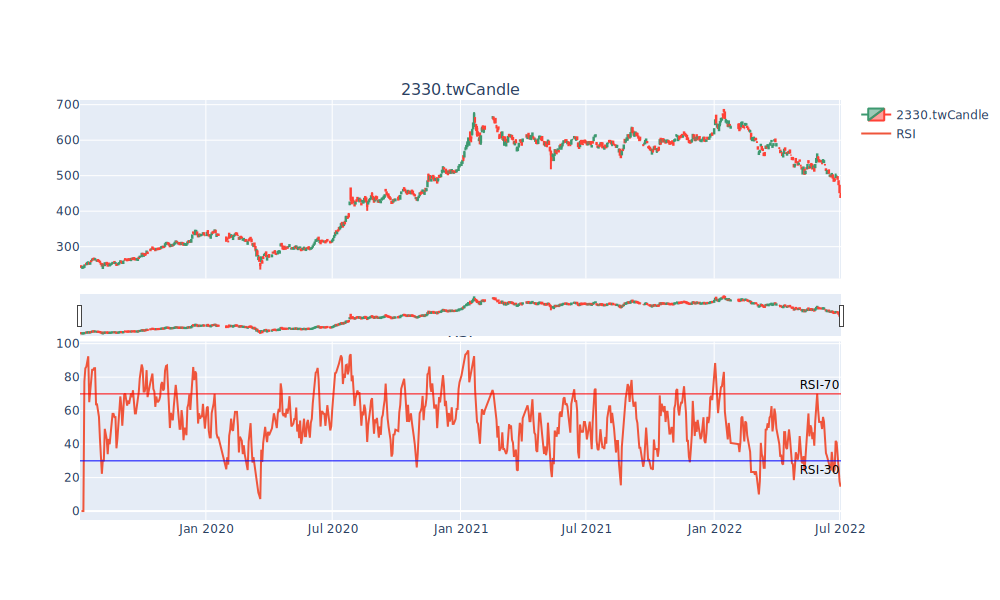

In [ ]:
# ['DIF'] 每列之間 ['Close'] 的差值
# ['U'] 計算RSI內的U 利用['DIF']計算上漲時 U = 當日收盤價 - 前日收盤價，D = 0
# ['D'] 計算RSI內的D 利用['DIF']計算下跌時 U = 0，D = 前日收盤價 - 當日收盤價
# ['EMA14'] 計算 ['Close'] 14天指數移動平均
def ticker_rsi(ticker, period_time, intervals_time):
    ticker_df = yf.download(tickers=ticker, period=period_time, interval=intervals_time)
    ticker_df["DIF"] = ticker_df["Close"].diff()
    def cal_U(num):
        if num > 0:
            return num
        else:
            return 0
    def cal_D(num):
        num = -num
        return cal_U(num)
    ticker_df["U"] = ticker_df["DIF"].apply(cal_U)
    ticker_df["D"] = ticker_df["DIF"].apply(cal_D)
    ticker_df["EMAU"] = ticker_df["U"].ewm(span = 14).mean()
    ticker_df["EMAD"] = ticker_df["D"].ewm(span = 14).mean()
    ticker_df["RSI"] = ticker_df["EMAU"] / ( ticker_df["EMAU"] + ticker_df["EMAD"]) * 100
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.15, subplot_titles=(ticker+"Candle", "RSI"))
    candle = go.Candlestick(x=ticker_df.index, open=ticker_df["Open"], high=ticker_df["High"],
                                                low=ticker_df["Low"], close=ticker_df["Close"], name=ticker+"Candles")
    rsi = go.Scatter(x=ticker_df.index, y=ticker_df["RSI"], name="RSI")
    fig.add_trace(candle, row=1, col=1)
    fig.add_trace(rsi, row=2, col=1)
    fig.add_hline(y=70, line_width=1, line_color="red", annotation_text="RSI-70", row=2, col=1,
                            annotation_position="top right", annotation_font_color="black")
    fig.add_hline(y=30, line_width=1, line_color="blue", annotation_text="RSI-30", row=2, col=1,
                        annotation_position="bottom right", annotation_font_color="black")
    fig.update_xaxes(rangeslider_visible=True, rangeslider_thickness=0.1)
    fig.update_layout(height=600, width=1000, xaxis_rangebreaks = [dict(bounds = ["sat", "mon"])])
    fig.update_xaxes(rangeslider= {'visible':False}, row=2, col=1)
    fig.show("svg")

ticker_rsi("2330.tw", "3y", "1d")

In [ ]:
!pip install yfinance
!pip install yfinance --upgrade --no-cache-dir
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas as pd
def ticker_rsi(ticker, period_time, intervals_time):
    ticker_df = yf.download(tickers=ticker, period=period_time, interval=intervals_time)
    ticker_df["DIF"] = ticker_df["Close"].diff()
    def cal_U(num):
        if num > 0:
            return num
        else:
            return 0
    def cal_D(num):
        num = -num
        return cal_U(num)
    ticker_df["U"] = ticker_df["DIF"].apply(cal_U)
    ticker_df["D"] = ticker_df["DIF"].apply(cal_D)
    ticker_df["EMAU"] = ticker_df["U"].ewm(span = 14).mean()
    ticker_df["EMAD"] = ticker_df["D"].ewm(span = 14).mean()
    ticker_df["RSI"] = ticker_df["EMAU"] / ( ticker_df["EMAU"] + ticker_df["EMAD"]) * 100
    print(ticker_df)
ticker_rsi("2330.tw","3y","1d")

[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close   Adj Close    Volume   DIF    U     D  \
Date                                                                            
2019-07-04  244.5  245.0  242.5  244.0  227.385712  17481240   NaN  0.0   0.0   
2019-07-05  244.5  245.0  241.5  243.0  226.453796  22867074  -1.0  0.0   1.0   
2019-07-08  240.0  244.5  240.0  242.5  225.987839  27787909  -0.5  0.0   0.5   
2019-07-09  241.5  243.0  240.5  242.0  225.521896  16418987  -0.5  0.0   0.5   
2019-07-10  243.0  247.0  243.0  247.0  230.181442  23812131   5.0  5.0   0.0   
...           ...    ...    ...    ...         ...       ...   ...  ...   ...   
2022-06-28  496.0  500.0  496.0  497.5  497.500000  15274062  -1.0  0.0   1.0   
2022-06-29  496.0  498.5  491.0  491.0  491.000000  30533789  -6.5  0.0   6.5   
2022-06-30  484.5  486.5  476.0  476.0  476.000000  46311432 -15.0  0.0  15.0   
2022-07-01  471.5  474.0  452.5  453.5  

# "Be fearful when others are greedy, and greedy when others are fearful." - Warren Buffett  
## PART2 Fear & Greed Index (CNN恐懼與貪婪指數)
除了想要的股票資訊可以透過爬蟲或利用API取得外，市場上還有一個重要的指標做為判斷市場展望的指數就是CNN編製的[恐懼貪婪指數](https://edition.cnn.com/markets/fear-and-greed)

![](https://s.yimg.com/os/creatr-uploaded-images/2022-05/91c2ae50-d58e-11ec-b3ef-3856a834018e)

CNN 恐懼與貪婪指數為採用美股市場情緒相關變數所編製的綜合指標，其中變數包括：  
1-市場動能  
2-股價強度  
3-股價廣度
4-多空比率  
5-市場波動  
6-避險需求  
7-垃圾債券需求  

該指數計算這些單獨的變數偏離其平均值的程度，並賦予相同權重。  
指數低於20-25代表市場對未來展望極度恐懼  
指數介於50左右代表市場對未來展望保持中性  
指數高於75-80代表市場對未來展望保持極度貪婪  

CNN 前陣子也提供了時間軸圖表來展示恐懼與貪婪指數的歷史資料，時間軸長度為1年
![](https://s.yimg.com/os/creatr-uploaded-images/2022-05/eed60b00-d58e-11ec-b7ff-80e9b7e80241)

接下來，我們就試著使用python工具取得更長時間的恐懼與貪婪指數並產出圖表，來看看與0050之間的趨勢關係  


---

利用chrome開發人員模式可知資料是URL在 https://production.dataviz.cnn.io/index/fearandgreed/graphdata/2022-07-05 ，格式為json，開始爬資料吧

In [92]:
import requests
import json
import csv
from datetime import datetime

# 運用requests套件取得Fear & Greed Index歷史數據
url = "https://production.dataviz.cnn.io/index/fearandgreed/graphdata/"
date = '2022-07-01'
headers = {
    "authority": "production.dataviz.cnn.io",
    "method": "GET",
    "path": "/index/fearandgreed/graphdata/"+date,
    "scheme": "https",
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"
}
res = requests.get(url+date, headers = headers)
data = json.loads(res.text)
data

{'rating': 'extreme fear', 'x': 1657000837767.0, 'y': 24.6002294893857}

In [91]:
# 需要的資料存在"fear_and_greed_historical" : "data" : "x" 與"y"
# 將"data" 取出存入fg_data，建立一個空字典fear_grid_value準備放入 {"x" : "y"}
# 並將fear_grid_value中的key-value值寫成csv檔案
# 有了csv就可用pandas轉成DataFrame格式，就可以跟與其他股票資訊一起分析
fg_data = data["fear_and_greed_historical"]["data"]
fear_grid_value = {}
filename = "data/fear_greed_20220705.csv"
with open(filename, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(['Date,Fear Greed'])
    for data in fg_data:
        dt = datetime.fromtimestamp(data['x']/1000).strftime("%Y-%m-%d")
        fear_grid_value[dt] = int(data['y'])
        writer.writerow([dt, int(data['y'])])

                Date,,Fear Greed
2022-07-01 NaN                24
2022-07-02 NaN                24
2022-07-04 NaN                24
2022-07-05 NaN                24
           NaN                24


最後將fear & greed index 與美國sp500與台灣0050收盤價輸出圖表

In [181]:
import yfinance as yf
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 準備好fear & greed index 、SPY、0050
df = pd.read_csv("data/fear_greed_20220705.csv")
df2 = yf.download(["SPY", "0050.TW"], start="2011-01-01")

In [179]:
# 首先把F&G資料整理成與yfinance下載的格式一樣，idnex為datetime格式
# yfinance只取收盤價
# 運用merge inner方式合併，保留有相同日期的內容
df.columns = ["Date","F&G Index"]
df.set_index(pd.to_datetime(df['Date'],format='%Y/%m/%d'),inplace=True)
df = df.drop(["Date"], axis=1)
df2 = df2["Close"]

ticker_fg_data = df.merge(df2, how='inner', left_index=True, right_index=True)
ticker_fg_data

,F&G Index,0050.TW,SPY
Date,,,
2011-01-03,68,61.450001,127.050003
2011-01-04,68,61.299999,126.980003
2011-01-05,67,60.299999,127.639999
2011-01-06,64,60.200001,127.389999
2011-01-07,63,59.650002,127.139999
...,...,...,...
2022-06-30,22,115.800003,377.250000
2022-07-01,24,111.550003,381.239990
2022-07-04,24,110.449997,NaN


In [185]:
fg_index = go.Scatter(x = ticker_fg_data.index, y = ticker_fg_data["F&G Index"], line = dict(color = "blue", width = 1), name = "F&G Index")
spy = go.Scatter(x = ticker_fg_data.index, y = ticker_fg_data["SPY"], line = dict(color = "green", width = 1), name = "SPY")
tw0050 = go.Scatter(x = ticker_fg_data.index, y = ticker_fg_data["0050.TW"], line = dict(color = "red", width = 1), name = "0050 TW")

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace=fg_index, secondary_y=False)
fig.add_trace(trace=spy, secondary_y=True)
fig.add_trace(trace=tw0050, secondary_y=True)


# 設定畫布layout
fig.update_layout(title="F&G Index & SPY & 0050.TW", width=1200, height=600)

fig.update_xaxes(rangeslider_visible=True, title = "Dates Zoom Slider")

# 用xaxis_rangebreaks把bang掉指定區間(bounds)或日期(value)(如資料單位為min，可用dict(bounds=[13.5, 9], pattern="hour")把收盤時間ban掉 )
fig.update_layout(title = "Dates Zoom Slider", xaxis_rangebreaks = [dict(bounds = ["sat", "mon"])])
fig.update_yaxes(title="F&G Index & Price")
# plotly產生互動式圖檔為.html，因github不支援所以這邊使用show("svg")
# 本地端可用fig.show()
fig.show()